# Working with XDF data using MNE
The goal of this notebook is to import data saved using the LSL Lab Recorder, and run through some pre-processing steps using [MNE-Python](https://mne.tools/stable/index.html)!

In [1]:
# import mne
import matplotlib.pyplot as plt
import pyxdf
import numpy as np

## Path to dataset

In [76]:
DATA_PATH = r'C:\Users\labadmin\Desktop\CGX_data_collection\sub-test3\ses-1\diverse\\'
DATA_PATH+= 'sub-test3_ses-1_task-Default_run-001_diverse.xdf'

#DATA_PATH = r'C:\Users\labadmin\Desktop\CGX_data_collection\sub-test-dvs\ses-1\dvs\\'
#DATA_PATH += r'sub-test-dvs_ses-1_task-Default_run-001_dvs.xdf'

In [77]:
# Read in the LSL streams from the XDF file
streams, header = pyxdf.load_xdf(DATA_PATH)

In [83]:
streams[3]

{'info': defaultdict(list,
             {'name': ['MIDIStream'],
              'type': ['MIDI'],
              'channel_count': ['3'],
              'channel_format': ['int32'],
              'source_id': ['timsterriblekeyborb'],
              'nominal_srate': ['0.000000000000000'],
              'version': ['1.100000000000000'],
              'created_at': ['11243.06953115800'],
              'uid': ['3ab79ef8-833d-4178-b528-7900ed2134af'],
              'session_id': ['default'],
              'hostname': ['jobstNotebook'],
              'v4address': [None],
              'v4data_port': ['16574'],
              'v4service_port': ['16574'],
              'v6address': [None],
              'v6data_port': ['16575'],
              'v6service_port': ['16575'],
              'desc': [None],
              'stream_id': 2,
              'effective_srate': 0}),
 'footer': {'info': defaultdict(list,
              {'first_timestamp': ['14365.124644079'],
               'last_timestamp': ['14369.

In [79]:
header

{'info': defaultdict(list,
             {'version': ['1.0'], 'datetime': ['2023-07-05T19:26:54-0400']})}

Stream Name: CGX Quick-32r Q32r-0524	Type: EEG
Stream Name: CGX Quick-32r Q32r-0524 Impedance	Type: Impeadance
Stream Name: ev_ts	Type: timestamp
Stream Name: MIDIStream	Type: MIDI
Stream Name: glove_data	Type: imu_data
Stream Name: MyAudioStream	Type: Audio


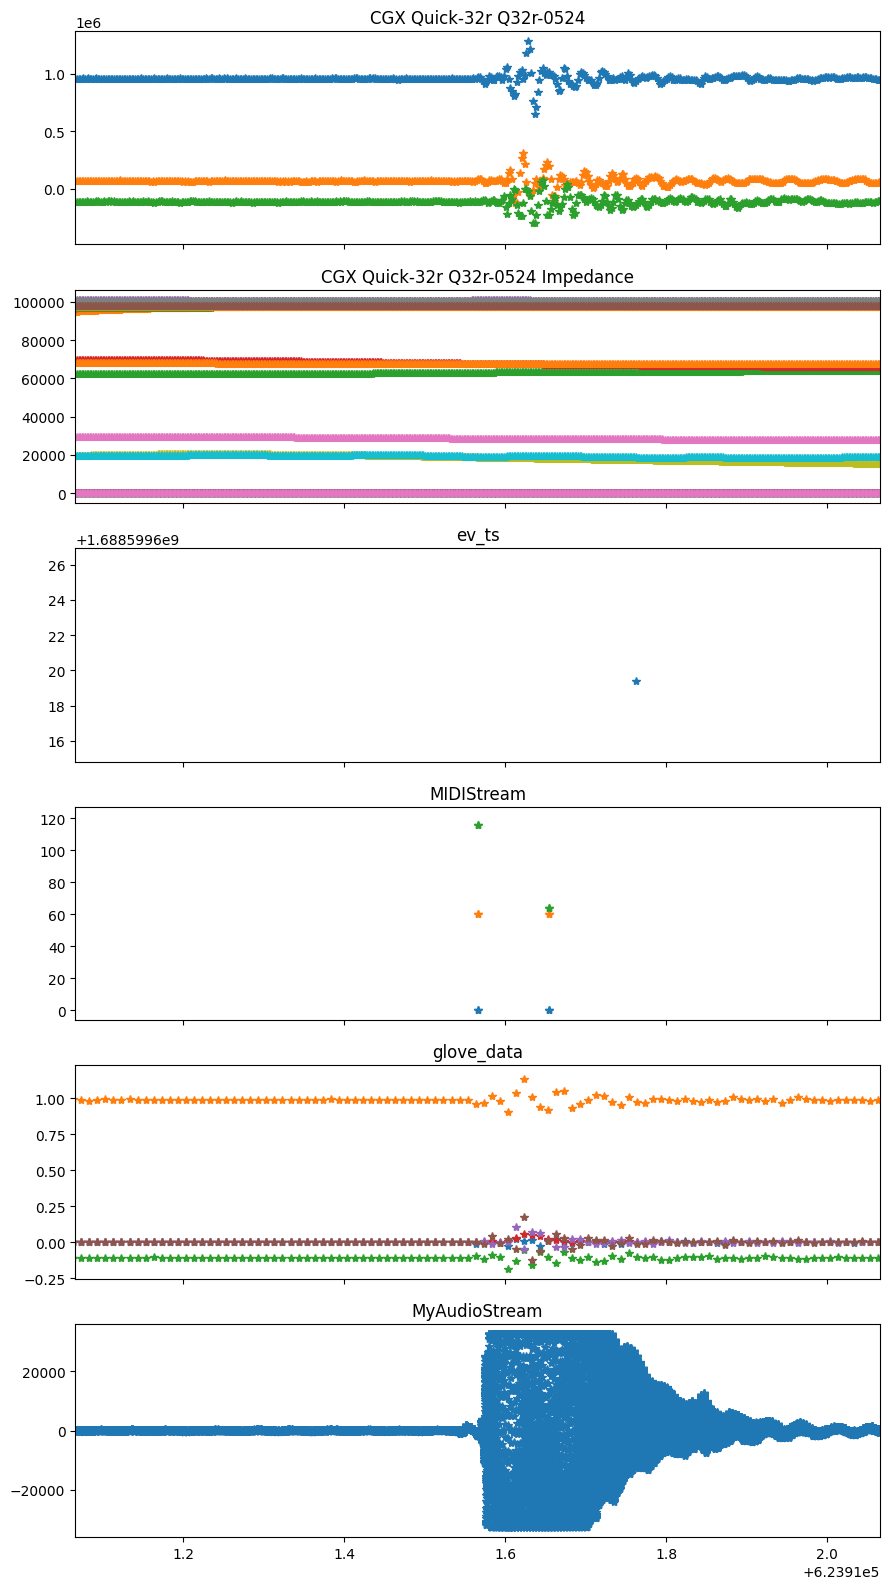

In [89]:
# Dict structure of a stream object

fig, ax = plt.subplots(len(streams), 1, sharex=True, figsize = (9, 16))


for i, s in enumerate(streams):
    
    s_name = s['info']['name'][0]
    s_type = s['info']['type'][0]
    print(f'Stream Name: {s_name}\tType: {s_type}')
   
    s_data = s['time_series']
    s_time = s['time_stamps']
    
    if 'CGX' in s_name and 'EEG' in s_type:
        ax[i].plot(s_time, s_data[:, -5:-2], '*')
        ax[i].set_title(s_name)
    else:
        ax[i].plot(s_time, s_data, '*')
        ax[i].set_title(s_name)
    
    
    ax[i].set_xlim([623911.56546364 - 0.5, 623911.56546364 + 0.5])
    
plt.tight_layout()

In [50]:
streams[0]['time_series'] - streams[0]['time_series'][0]

array([[ 0.        ],
       [ 1.00000405],
       [ 2.00006294],
       [ 2.99994397],
       [ 3.99993491],
       [ 4.99950099],
       [ 5.99994493],
       [ 6.99986005],
       [ 7.99979401],
       [ 8.99999499],
       [10.00004387],
       [11.00004983],
       [11.99977303],
       [13.0000329 ],
       [13.99977088],
       [14.99994588],
       [16.00000501],
       [16.99996996],
       [18.00002193],
       [18.99962783],
       [19.99996996],
       [21.00004983],
       [22.00005889],
       [22.99974489],
       [24.00000691],
       [24.99994493],
       [25.99991894],
       [27.00000596],
       [28.00004292]])

In [31]:
streams[0]['time_stamps'] - streams[0]['time_stamps'][0]

array([  0.        ,   1.00015786,   2.00031573,   3.00047359,
         4.00063146,   5.00078932,   6.00094719,   7.00110505,
         8.00126292,   9.00142078,  10.00157864,  11.00173651,
        12.00189437,  13.00205224,  14.0022101 ,  15.00236797,
        16.00252583,  17.0026837 ,  18.00284156,  19.00299943,
        20.00315729,  21.00331515,  22.00347302,  23.00363088,
        24.00378875,  25.00394661,  26.00410448,  27.00426234,
        28.00442021,  29.00457807,  30.00473594,  31.0048938 ,
        32.00505166,  33.00520953,  34.00536739,  35.00552526,
        36.00568312,  37.00584099,  38.00599885,  39.00615672,
        40.00631458,  41.00647244,  42.00663031,  43.00678817,
        44.00694604,  45.0071039 ,  46.00726177,  47.00741963,
        48.0075775 ,  49.00773536,  50.00789322,  51.00805109,
        52.00820895,  53.00836682,  54.00852468,  55.00868255,
        56.00884041,  57.00899828,  58.00915614,  59.00931401,
        60.00947187,  61.00962973,  62.0097876 ,  63.00

In [28]:
streams[0]['info']

defaultdict(list,
            {'name': ['ev_ts'],
             'type': ['timestamp'],
             'channel_count': ['1'],
             'channel_format': ['float32'],
             'source_id': [None],
             'nominal_srate': ['1.000000000000000'],
             'version': ['1.100000000000000'],
             'created_at': ['17296.70363437900'],
             'uid': ['391c5fa8-df22-4d92-8ea3-4454b0185274'],
             'session_id': ['default'],
             'hostname': ['suman-ThinkPad-P14s-Gen-1'],
             'v4address': [None],
             'v4data_port': ['16573'],
             'v4service_port': ['16572'],
             'v6address': [None],
             'v6data_port': ['16574'],
             'v6service_port': ['16573'],
             'desc': [None],
             'stream_id': 3,
             'effective_srate': 0.9998435821743605})